</center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Práctico 3: Visualizaciones no tradicionales</font></h2>
<center><img src="images/charts.jpg" width=700></center>

### <b><span style='color:#F1A424'>Tabla de contenidos</span></b> <a class='anchor' id='top'></a>
<b></b>
<div style=" background-color:#3b3745; padding: 13px 13px; border-radius: 8px; color: white">
<li> <a href="#0">Importe las librerías necesarias</a></li>
<li> <a href="#1">Word cloud (*)</a></li>
<li><a href="#2">Word cloud con masks (***)</a></li>
<li><a href="#3">Venn diagrams (**)</a></li>
<li><a href="#4">Diagrama radial (***)</a></li>
<li><a href="#5">Diagramas de Sankey (*)</a></li>
<li><a href="#6">Bullet graph (**)</a></li>
<li><a href="#7">Geographical maps (**)</a></li>
<li><a href="#8">Stacked bars (***)</a></li>
<li><a href="#9">Lollipop graph (**)</a></li>
<li><a href="#10">Dot plot (**)</a></li>
<li><a href="#11">Area graph (***)</a></li>
</div>
    
Al finalizar el práctico usted aprenderá:
- Mapas relacionados a Natural Language Processing (Word clouds).
- Mapas relacionados a matemática y estadística (Venn Diagrams).
- Mapas relacionados a rendimientos (Radial Diagram).
- Mapas relacionados a ingeniería de procesos industriales (Sankey Diagram).
- Mapas geográficos.
- Mapas comparativos.
    
<div class="alert alert-block alert-warning">  
    <b>Nota:</b> A lo largo del práctico usted notará asteriscos (*) al lado de cada ejercicio. Estos indican el nivel de dificultad. Se sugiere realizar el trabajo en conjunto y no por separado.
</div>

# <b>0 <span style='color:#F1A424'>|</span> Importe las librerías necesarias</b><a class='anchor' id='0'></a> [↑](#top)

***

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import regex as re
import seaborn as sns

from IPython.display import Image as im
from math import pi
from matplotlib.sankey import Sankey
from matplotlib_venn import venn3, venn3_circles
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# <b>1 <span style='color:#F1A424'>|</span> Word cloud (*)</b><a class='anchor' id='1'></a> [↑](#top)

***
    
Los Word clouds son frecuentemente utilizados para visualizar las palabras más utilizadas en un corpus (lista de textos). Es una gran herramienta visual para analizar sentimientos, reviews y tweets (entre otros) y así obtener información vital de nuestros datos.
    
En el siguiente ejemplo usted analizará cuáles son las palabras más frecuentemente utilizadas por integrantes del partido republicano y democrático. Analizará aproximadamente 86k tweets y visualizará las palabras usando la librería [wordcloud](https://amueller.github.io/word_cloud/index.html).

Para esto:
- Cargue el archivo CSV que contiene los tweets y divida el dataframe en dos: uno llamado "republicans" que contiene los tweets republicanos y otro "democrats" que contiene los tweets demócratas.
- En la celda siguiente se le proporciona un código de pre-procesamiento de lenguaje natural (un tema de este curso que usted verá más adelante). No tiene por qué entender este código, simplemente usted debe ingresar una lista que contiene los tweets y este código le devolverá una lista con las palabras utilizadas en todos los tweets del dataframe para cada partido político. La celda incluye comentarios en caso de que usted quiera comprender este pre-procesamiento.
- Básese en el siguiente [ejemplo](https://amueller.github.io/word_cloud/auto_examples/simple.html)
- En el ejemplo provisto el archivo llamado "text" equivale a nuestras listas de palabras.
- Configure los [parámetros](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) del WordCloud de tal forma que: 
    1. El fondo sea blanco.
    2. La cantidad de palabras este limitada a 1000.
    3. El colormap sea 'Reds' para republicanos y 'Blues' para demócratas.
- Ajuste `figsize` a (12, 8) y añádale un título.

Sus gráficas deberían verse similares a las siguientes:
<table><tr>
<td> <img src="images/1a.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="images/1b.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

In [6]:
tweets = pd.read_csv('./data/tweets.csv', sep= ',')
STOPWORDS.update(['amp','today','day','new','thank','morning','year','will','week','bill'])

In [ ]:
republican_tweets =  # ingrese aquí la lista de tweets
raw_string = ''.join(republican_tweets) # join tweets
no_links = re.sub(r'http\S+', '', raw_string) # sustituir HTTP
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links) # sustituir unicode
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode) # sustituir caracteres especiales
words = no_special_characters.split(" ") # split 
words = [w for w in words if len(w) > 2]  # ignorar short words
words = [w.lower() for w in words] # hacer lowercase
republican_words = [w for w in words if w not in STOPWORDS] # quitar stop words

democrat_tweets =  # ingrese aqui la lista de tweets
raw_string = ''.join(democrat_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]
words = [w.lower() for w in words]
democrat_words = [w for w in words if w not in STOPWORDS]

# <b>2 <span style='color:#F1A424'>|</span> Word cloud con masks (***)</b><a class='anchor' id='2'></a> [↑](#top)

***

Para hacer los WordClouds más visualmente atractivos podemos agregarles **masks**. Una mask es una imagen (puede ser negra o a color y generalmente con fondo blanco o negro) la cual le proporciona el contorno que adopta la WordCloud.

En este ejercicio, usted cargará dos imágenes: "rep_mask.png" y "dem_mask.png", las cuales contienen los logos a color de cada partido político. Estas servirán para el contorno y color de la WordCloud.

Para realizar el ejercicio:
- Cargue las masks basándose en el siguiente [ejemplo](https://amueller.github.io/word_cloud/auto_examples/masked.html). Configure `contour_width` = 3, `contour_color`='black' y que la cantidad de palabras sea 200.
- Básese en este [ejemplo](https://amueller.github.io/word_cloud/auto_examples/colored.html) para colorear la imagen en base a los colores de la imagen.
- Ajuste el figsize a (15,12) y añádale un título.

Sus gráficas deberían verse similares a las siguientes:
<table><tr>
<td> <img src="images/2i.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="images/2ii.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

# <b>3 <span style='color:#F1A424'>|</span> Venn diagrams (**)</b><a class='anchor' id='3'></a> [↑](#top)

***

Los diagramas de Venn son muy usados para representar grupos que se intersectan. Nos permite visualizar niveles de jerarquía, intersecciones de conjuntos y subgrupos. 

Reproduzca el siguiente [diagrama](https://1.bp.blogspot.com/-ju4m6PBOrgo/V-E5qz99SaI/AAAAAAAAMF0/gle0zsZz_nIBEMVg0EdZHoGJhjlnBzv1gCLcB/s1600/moz-screenshot-3-729576.png) sin tener en cuenta el círculo más externo (el que dice Data Science).
- Instale la librería [matplotlib-venn](https://pypi.org/project/matplotlib-venn/). Hágalo mediante pip, no use easy-install.
- En la celda siguiente se le proporciona un ejemplo sencillo.
- Como `matplotlib-venn` solo acepta valores numéricos no interesa como esté relleno (puede rellenarlo con unos). Para que aparezcan las labels que nos importan debe usar el comando `v.get_label_by_id().set_text()`. Por ejemplo, si quisiésemos que la label "Computer Science" aparezca en el círculo rojo sería: `v.get_label_by_id('100').set_text('Computer Science')`.
- Deberá determinar qué ids se mapean con qué posiciones dentro del diagrama.
- Puede ser de utilidad mirar los ejemplos de la librería original.
- Configure `figsize` a (15,10). Añadale un título a la gráfica.

Su gráfica debería verse similar a la siguiente: 
</center><img src="images/3.png" width=400></center>

In [ ]:
v = venn3(subsets = (20, 10, 12, 10, 9, 4, 3), set_labels = ('Group A', 'Group B', 'Group C'), alpha = 0.5)
v.get_label_by_id('10').set_text('a')

# <b>4 <span style='color:#F1A424'>|</span> Diagrama radial (***)</b><a class='anchor' id='4'></a> [↑](#top)

***

Los diagramas radiales nos permiten visualizar el área formada por datos multivariantes y medir rendimientos . Éstos gráficos son utilizados en los más diversos rubros como la psicología, el diseño de hardware, contabilidad, etc.

A continuación usted deberá evaluar los gastos semestrales de una empresa, la cual se le proporcionan sus datos en la celda siguiente:

- Corra la siguiente celda para cargar el dataframe.
- Para realizar la gráfica básese fuertemente en el siguiente [ejemplo](https://python-graph-gallery.com/391-radar-chart-with-several-individuals/). Casi no deberá modificar el código provisto en el mismo.
- Ajuste los ticks y labels para mostrar todo el rango de valores.
- Agréguele `pad` a los ticks para que las labels con los nombres de los distintos rubros no se superpongan con la gráfica. **Tip:** use [plt.tick_params()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html).
- Configure `figsize` = (12, 8)
- Añádale un título a la gráfica.
- Agréguele `pad` al título.

Su gráfica debería verse similar a la siguiente: 
</center><img src="images/4.png" width=400></center>

In [ ]:
# Datos de la empresa
df = pd.DataFrame({
'group': ['1er semestre','2do semestre'],
'Ventas': [31, 28],
'Marketing': [39, 19],
'Administración': [18, 27],
'Desarrollo': [7, 35],
'Atención al cliente': [12, 43],
'Ingeniería': [47, 40]
})
df.head()

# <b>5 <span style='color:#F1A424'>|</span> Diagramas de Sankey (*)</b><a class='anchor' id='5'></a> [↑](#top)

***

En clase ha visto los diagramas de Sankey. Éstos son utilizados para diagramar flujos tanto de dinero (empresas) como de energía (industrias). Son diagramas muy utilizados en contabilidad y termodinámica de procesos energéticos.

Una empresa ha lanzado un producto. Inicialmente el 100% de la financiación proviene:
- 70% de la inversión inicial.
- 20% de inversores extranjeros.
- 10% de financiación estatal.

Luego se gasta dinero en el proceso de desarrollo del producto. Los porcentajes de dinero son respecto al capital inicial. A fin de año el balance es negativo:
- 40% gasto en desarrollo.
- 20% gasto en investigación.
- 30% gasto en testing del producto.
- 25% gasto en marketing y lanzamiento del producto al mercado.

Grafique un diagrama de Sankey para el flujo de dinero en el desarrollo del producto:
- Básese en el siguiente [ejemplo](https://python-graph-gallery.com/220-sankey-diagram-with-matplotlib/) para entender como realizar el diagrama.
- Configure `figsize` = (15,8).
- Añádale un título a la gráfica.
- Apáguele el `axis` a la gráfica.
- Las labels deben estar no superpuestas con el diagrama. Puede usar `.texts[].set_position(xy=(,))`.

Su gráfica debería verse similar a la siguiente: 
</center><img src="images/5.png" width=600></center>

# <b>6 <span style='color:#F1A424'>|</span> Bullet graph (**)</b><a class='anchor' id='6'></a> [↑](#top)

***

En clase ha visto los bullet graphs. Éstos son utilizados para comparar performances relativas, hacer benchmarkings y visualizar rangos de aceptabilidad de performance.

Reproduzca el ejemplo visto en clase. Para esto:
- Se le proporciona a continuación en la siguiente celda una función hecha por [Chriss Moffit](https://pbpython.com/bullet-graph.html). No tiene que entender la función sino leer los comentarios en rojo para entender sus parámetros. También al final de la celda se le proporciona un ejemplo que le aclarará mejor su uso.
- Se le proporcionan los 5 datos del gráfico que deberá reproducir.
- Deberá graficar 5 bulletgraphs, uno para cada set de datos.
- Use axis label para configurar las unidades.
- Cambie el target color de manera que la barra sea negra.
- Averigüe acerca de las **seaborn palettes**. Las mismas le servirán para que el color sea un gris dégradé.
- Configure el parámetro limits para establecer los distintos niveles de aceptabilidad.

Su gráfica debería verse similar a la siguiente:
</center><img src="images/6.png" width=600></center>

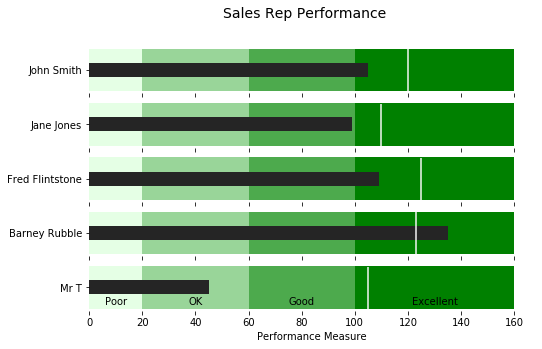

In [2]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

### Ejemplo:
    
data_to_plot2 = [("John Smith", 105, 120),
                 ("Jane Jones", 99, 110),
                 ("Fred Flintstone", 109, 125),
                 ("Barney Rubble", 135, 123),
                 ("Mr T", 45, 105)]
bulletgraph(data_to_plot2, limits=[20, 60, 100, 160],
            labels=["Poor", "OK", "Good", "Excellent"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Sales Rep Performance")

In [ ]:
data_1 = [("Revenue", 275, 250)]
data_2 = [("Profit", 22.5, 26)]
data_3 = [("Avg Order Size", 310, 550)]
data_4 = [("New customers", 1600, 2100)]
data_5 = [("Satisfaction", 4.75, 4.6)]

# <b>7 <span style='color:#F1A424'>|</span> Geographical maps (**)</b><a class='anchor' id='7'></a> [↑](#top)

***

En otros prácticos ya ha visto mapas geográficos. Estos sirven para representar datos por zonas geográficas.

A continuación, usted recreará un mapa geográfico de los distintos estados de la India, resaltando a color las distintas poblaciones y densidades de población por estado.

Para graficar mapas se utilizan archivos GEOJSON. Un formato estandarizado para representar zonas geográficas. Los archivos GEOJSON contienen un campo "geometry" que contiene coordenadas geográficas que forman un polígono (área) que será graficado. Además, contiene un campo "properties" con metadatos de esa región, como por ejemplo: ID de la región y nombre.

1. Usted graficará el mapa usando [choropleth](https://plotly.com/python/choropleth-maps/):
    - Corra la siguiente celda para obtener el archivo GEOJSON y los datos a graficar.
    - Grafique de tal manera que el color quede determinado por la población de los estados.
    - El parámetro locations debe estar configurado como "id" para que exista un mapeo entre el dataframe y el GEOJSON.
    - Establezca un título para la gráfica.


2. Ahora grafique la densidad de población:
    - El color debe ser determinado por el campo "DensityScale".
    - Los parámetros `hover` (flotar en inglés) permiten mostrar datos cuando uno pasa el cursor por encima de las regiones. 
    - Configure los parámetros `hover_name` y `hover_data` de tal modo que aparezca el nombre del estado y el campo "Density" al pasar el cursor por encima de la gráfica.
    - Estableza un título.

**Nota:** si es de su interés puede crear sus propios mapas geográficas usando [geojson.io](https://geojson.io/#map=2/20.0/0.0)
Su gráfica debería verse similar a la siguiente:
</center><img src="images/7.png" width=600></center>

In [ ]:
import plotly.io as pio
pio.renderers.default = 'browser'
india_states = json.load(open("data.geojson", "r"))
df = pd.read_csv('india_census.csv',sep=',')

# <b>8 <span style='color:#F1A424'>|</span> Stacked bars (***)</b><a class='anchor' id='8'></a> [↑](#top)

***

En clase ha visto las stacked columns o stacked bars. Estas son utilizadas para representar porcentajes relativos de un total.

Ha continuación se le proporcionan datos de ventas mensuales de tres empleados: Alejo, Victoria y Celeste. Usted es su manager y quiere ver el rendimiento relativo de los tres empleados y decide usar stacked columns.

Para crear la gráfica:
1. Genere una lista "totals" con la suma total de las ventas de cada mes.
2. Genere tres listas, una para cada empleado, que contenga el porcentaje de ventas de cada empleado. Es decir, las ventas del empleado en ese mes dividido la cantidad de ventas de todo el mes.
3. Utilize la función [plt.bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) para graficar las barras. Tendrá que utilizarla tres veces, una para cada empleado.
4. Configure los parámetros:
    - `label` = nombre del empleado.
    - `width` = 0.85
    - `edgecolor` = 'white'
    - `color` = un color que usted quiera.
    - `xticks` = use los xticks proporcionados en la celda siguiente.
5. Deberá configurar el parámetro "bottom" (la cual es una lista) de la función plt.bar() de tal manera que la misma sea la suma cumulativa de los porcentajes relativos de los empleados. Es decir, si Alejo es el primer empleado que graficará entonces no precisará lista, luego si Victoria es la segunda empleada entonces el valor de "bottom" será los porcentajes de Alejo, y por último, si Celeste es la tercer empleada que grafica la lista "bottom" será la suma de los procentajes de Alejo y Victoria.
6. Agregue los rótulos y el título de la gráfica.
7. Utilize `plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')` para que la leyenda no quede dentro de la gráfica.


Su gráfica debería verse similar a la siguiente:
</center><img src="images/8.png" width=600></center>

In [ ]:
# Data
xticks = [0,1,2,3,4]
names = ('Enero','Febrero','Marzo','Abril','Mayo')
raw_data = {'Alejo': [14, 20, 5, 32, 19],
            'Victoria': [10, 20, 7, 28, 26],
            'Celeste': [17, 15, 10, 25, 17]}
df = pd.DataFrame(raw_data)

# <b>9 <span style='color:#F1A424'>|</span> Lollipop graph (**)</b><a class='anchor' id='9'></a> [↑](#top)

***
 
Los gráficos Lollipop son una buena alternativa a los gráficos de barras y columnas estándar. Son especialmente útiles cuando la visualización es abrumadora debido a su tinta masiva porque el lollipop centra la atención en el valor.

Grafique el ejemplo visto en clase. Para eso:
- Cargue los datos en la celda siguiente.
- Haga dos subplots.
- En la primer subplot grafique el lollipop graph usando la función [plt.stem()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html). Esta graficará los datos verticalmente por lo que deberá rotar las xlabels.
- En la segunda subplot grafique los lollipops usando [plt.hlines()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html) para generar  el "palito" del lollipop y luego [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) para generar el "punto" del lollipop. 
- Agregue títulos.

Su gráfica debería verse similar a la siguiente:
</center><img src="images/9i.png" width=600></center>

In [ ]:
df = pd.read_csv('respondents.csv',sep=',')

# <b>10 <span style='color:#F1A424'>|</span> Dot plot (**)</b><a class='anchor' id='10'></a> [↑](#top)

***

En clase usted ha visto los dot plots. Son útiles para mostrar diferencias entre valores de una misma variable.
Reproduzca el ejemplo visto en clase para las diferencias porcentuales de logins de grandes compañías de software.

Para esto:
- Ejecute la celda siguiente para obtener el dataframe con los valores.
- Cree dos listas: una con los xticks y otra con los xlabels.
- Configure `figsize` = (12,8)
- Utilize la función [plt.hlines()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html) para generar los segmentos que uniran los puntos con los valores.
- Utilize dos veces [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) para graficar los puntos con los extremos.
- Agregue `xticks`, `xlabels`, `yticks`, `ylabels`.
- Agregue rótulos, título y leyenda.
- Agregue una grilla

Su gráfica debería verse similar a la siguiente:
</center><img src="images/10.png" width=600></center>

In [ ]:
# Create a dataframe
value1=[0.35, 0.43, 0.06, 0.07, 0.02, 0.06]
value2=[0.40, 0.45, 0.05, 0.04, 0.03, 0.05]
companies = ['Google', 'Facebook', 'Twitter','Yahoo', 'LinkedIn', 'Others']
df = pd.DataFrame({'group':companies, 'value1':value1 , 'value2':value2 })

# <b>11 <span style='color:#F1A424'>|</span> Area graph (***)</b><a class='anchor' id='11'></a> [↑](#top)

***

En clase ha visto las gráficas de áreas. Son gráficos apropiados cuando se quiere mostrar tendencias que representan el 100% a lo largo del tiempo. Un gráfico de área es esencialmente un gráfico de líneas, con cada segmento apilado uno encima del otro. De esta forma, muestra partes de un todo. 

Reproduzca el ejemplo visto en clase. Para eso:
- Ejecute la celda siguiente para obtener los datos necesarios.
- Configure los `xticks`, `xlabels` y colores necesarios.
- Utilize la función [plt.stackplot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stackplot.html) para hacer el gráfico de área.
- Haga dos for loops para anotar los textos necesarios en la gráfica. Le será de utilidad el dataframe `cumsum` que contiene la suma cumulativa de los datos del dataframe. Utilize la función [ax.annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) para hacer las anotaciones necesarias.
- Remueva los bordes del gráfica usando [ax.spines()](https://matplotlib.org/stable/api/spines_api.html).
- Configure los rótulos, la leyenda y el título.

Su gráfica debería verse similar a la siguiente:
</center><img src="images/11.png" width=800></center>

In [ ]:
y1=[26.8,24.97,25.69,24.07]
y2=[21.74,19.58,20.7,21.09]
y3=[13.1,12.45,12.75,10.79]
y4=[9.38,8.18,8.79,6.75]
y5=[12.1,10.13,10.76,8.03]
y6=[4.33,3.73,3.78,3.75]

df = pd.DataFrame([y1,y2,y3,y4,y5,y6])

cumsum = df.cumsum()
cumsum